In [ ]:
#pip install tensorflow

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path('train')
test_dir = pathlib.Path('test')

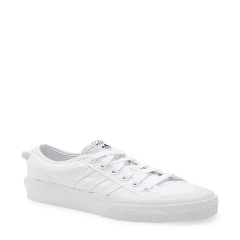

In [3]:
#visualize some data
import PIL
adidas = list(data_dir.glob('adidas/*'))
PIL.Image.open(str(adidas[0]))

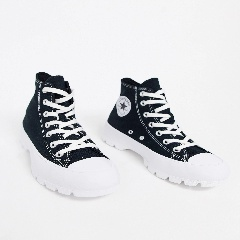

In [4]:
#visualize some data
import PIL
converse = list(data_dir.glob('converse/*'))
PIL.Image.open(str(converse[0]))

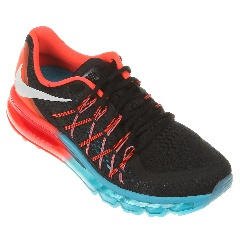

In [6]:
import PIL
nike = list(data_dir.glob('nike/*'))
PIL.Image.open(str(nike[3]))

In [ ]:
#load datasets using tf.keras.utils.image_dataset_from_directory

In [7]:
#set parameters
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 711 files belonging to 3 classes.
Using 569 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 711 files belonging to 3 classes.
Using 142 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['adidas', 'converse', 'nike']


In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
#using cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# create a basic Keras model

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
#train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
18/18 [==============================] - 28s 1s/step - loss: 1.4992 - accuracy: 0.3128 - val_loss: 1.0972 - val_accuracy: 0.3592
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 1.0829 - accuracy: 0.4288 - val_loss: 1.0790 - val_accuracy: 0.3451
Epoch 3/10
18/18 [==============================] - 24s 1s/step - loss: 1.0297 - accuracy: 0.4745 - val_loss: 1.0488 - val_accuracy: 0.4507
Epoch 4/10
18/18 [==============================] - 24s 1s/step - loss: 0.8840 - accuracy: 0.6098 - val_loss: 1.0851 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 23s 1s/step - loss: 0.6815 - accuracy: 0.7364 - val_loss: 1.2514 - val_accuracy: 0.4577
Epoch 6/10
18/18 [==============================] - 24s 1s/step - loss: 0.5169 - accuracy: 0.7909 - val_loss: 1.4484 - val_accuracy: 0.4648
Epoch 7/10
18/18 [==============================] - 23s 1s/step - loss: 0.3572 - accuracy: 0.8576 - val_loss: 1.5683 - val_accuracy: 0.5423
Epoch 8/10
18/18 [==

In [ ]:
#visualize the training results

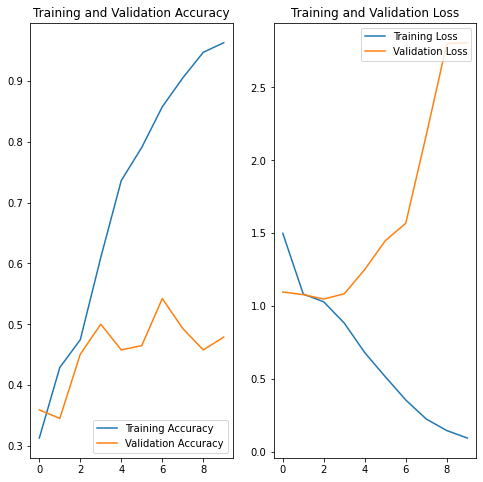

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# data augmenetation

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#visualize an example of data augmentation

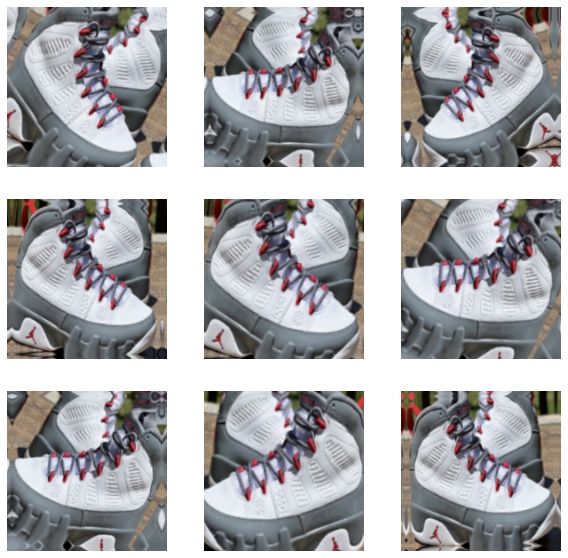

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
#create new Keras model

In [22]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs = 300
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/300
18/18 [==============================] - 38s 2s/step - loss: 1.4924 - accuracy: 0.3339 - val_loss: 1.0925 - val_accuracy: 0.3521
Epoch 2/300
18/18 [==============================] - 28s 2s/step - loss: 1.0854 - accuracy: 0.3743 - val_loss: 1.0668 - val_accuracy: 0.4155
Epoch 3/300
18/18 [==============================] - 27s 2s/step - loss: 1.0819 - accuracy: 0.3603 - val_loss: 1.0719 - val_accuracy: 0.4225
Epoch 4/300
18/18 [==============================] - 28s 2s/step - loss: 1.0646 - accuracy: 0.3779 - val_loss: 1.0879 - val_accuracy: 0.3803
Epoch 5/300
18/18 [==============================] - 27s 2s/step - loss: 1.0429 - accuracy: 0.4253 - val_loss: 1.1156 - val_accuracy: 0.3592
Epoch 6/300
18/18 [==============================] - 27s 1s/step - loss: 1.0311 - accuracy: 0.4517 - val_loss: 1.0453 - val_accuracy: 0.4789
Epoch 7/300
18/18 [==============================] - 28s 2s/step - loss: 1.0283 - accuracy: 0.4429 - val_loss: 1.0929 - val_accuracy: 0.4859
Epoch 8/300
1

Epoch 59/300
18/18 [==============================] - 26s 1s/step - loss: 0.3589 - accuracy: 0.8612 - val_loss: 1.4666 - val_accuracy: 0.6056
Epoch 60/300
18/18 [==============================] - 27s 1s/step - loss: 0.3148 - accuracy: 0.8893 - val_loss: 1.6238 - val_accuracy: 0.5915
Epoch 61/300
18/18 [==============================] - 25s 1s/step - loss: 0.3034 - accuracy: 0.8699 - val_loss: 1.7050 - val_accuracy: 0.5775
Epoch 62/300
18/18 [==============================] - 24s 1s/step - loss: 0.2956 - accuracy: 0.8858 - val_loss: 1.6943 - val_accuracy: 0.5845
Epoch 63/300
18/18 [==============================] - 25s 1s/step - loss: 0.3006 - accuracy: 0.8858 - val_loss: 1.8822 - val_accuracy: 0.5845
Epoch 64/300
18/18 [==============================] - 26s 1s/step - loss: 0.2884 - accuracy: 0.8946 - val_loss: 1.7038 - val_accuracy: 0.5986
Epoch 65/300
18/18 [==============================] - 26s 1s/step - loss: 0.3346 - accuracy: 0.8770 - val_loss: 1.6826 - val_accuracy: 0.6127
Epoch 

18/18 [==============================] - 25s 1s/step - loss: 0.1165 - accuracy: 0.9596 - val_loss: 2.9002 - val_accuracy: 0.5775
Epoch 117/300
18/18 [==============================] - 29s 2s/step - loss: 0.1233 - accuracy: 0.9543 - val_loss: 2.9608 - val_accuracy: 0.5775
Epoch 118/300
18/18 [==============================] - 24s 1s/step - loss: 0.1414 - accuracy: 0.9455 - val_loss: 2.5904 - val_accuracy: 0.6268
Epoch 119/300
18/18 [==============================] - 25s 1s/step - loss: 0.0926 - accuracy: 0.9684 - val_loss: 2.5149 - val_accuracy: 0.6338
Epoch 120/300
18/18 [==============================] - 24s 1s/step - loss: 0.0983 - accuracy: 0.9684 - val_loss: 2.4457 - val_accuracy: 0.6479
Epoch 121/300
18/18 [==============================] - 23s 1s/step - loss: 0.0991 - accuracy: 0.9631 - val_loss: 2.6384 - val_accuracy: 0.6268
Epoch 122/300
18/18 [==============================] - 25s 1s/step - loss: 0.1032 - accuracy: 0.9525 - val_loss: 3.0991 - val_accuracy: 0.6268
Epoch 123/300

18/18 [==============================] - 25s 1s/step - loss: 0.0580 - accuracy: 0.9807 - val_loss: 3.7182 - val_accuracy: 0.6690
Epoch 174/300
18/18 [==============================] - 24s 1s/step - loss: 0.1025 - accuracy: 0.9666 - val_loss: 3.8158 - val_accuracy: 0.6479
Epoch 175/300
18/18 [==============================] - 25s 1s/step - loss: 0.1795 - accuracy: 0.9490 - val_loss: 4.4723 - val_accuracy: 0.5704
Epoch 176/300
18/18 [==============================] - 24s 1s/step - loss: 0.2039 - accuracy: 0.9473 - val_loss: 3.6574 - val_accuracy: 0.6056
Epoch 177/300
18/18 [==============================] - 24s 1s/step - loss: 0.1422 - accuracy: 0.9578 - val_loss: 2.6942 - val_accuracy: 0.6901
Epoch 178/300
18/18 [==============================] - 25s 1s/step - loss: 0.1128 - accuracy: 0.9666 - val_loss: 2.9602 - val_accuracy: 0.6338
Epoch 179/300
18/18 [==============================] - 24s 1s/step - loss: 0.0988 - accuracy: 0.9596 - val_loss: 3.2348 - val_accuracy: 0.6338
Epoch 180/300

18/18 [==============================] - 24s 1s/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 3.9323 - val_accuracy: 0.6408
Epoch 231/300
18/18 [==============================] - 24s 1s/step - loss: 0.0666 - accuracy: 0.9754 - val_loss: 3.1319 - val_accuracy: 0.6479
Epoch 232/300
18/18 [==============================] - 25s 1s/step - loss: 0.0381 - accuracy: 0.9912 - val_loss: 3.6841 - val_accuracy: 0.6338
Epoch 233/300
18/18 [==============================] - 24s 1s/step - loss: 0.0389 - accuracy: 0.9859 - val_loss: 3.8670 - val_accuracy: 0.6338
Epoch 234/300
18/18 [==============================] - 24s 1s/step - loss: 0.0449 - accuracy: 0.9842 - val_loss: 4.6623 - val_accuracy: 0.6268
Epoch 235/300
18/18 [==============================] - 24s 1s/step - loss: 0.0751 - accuracy: 0.9842 - val_loss: 4.1341 - val_accuracy: 0.6268
Epoch 236/300
18/18 [==============================] - 23s 1s/step - loss: 0.0792 - accuracy: 0.9719 - val_loss: 4.1536 - val_accuracy: 0.6479
Epoch 237/300

18/18 [==============================] - 29s 2s/step - loss: 0.0230 - accuracy: 0.9947 - val_loss: 4.2995 - val_accuracy: 0.6479
Epoch 288/300
18/18 [==============================] - 31s 2s/step - loss: 0.0228 - accuracy: 0.9965 - val_loss: 4.0635 - val_accuracy: 0.6338
Epoch 289/300
18/18 [==============================] - 26s 1s/step - loss: 0.0347 - accuracy: 0.9842 - val_loss: 4.7072 - val_accuracy: 0.6338
Epoch 290/300
18/18 [==============================] - 26s 1s/step - loss: 0.0602 - accuracy: 0.9842 - val_loss: 4.0707 - val_accuracy: 0.6056
Epoch 291/300
18/18 [==============================] - 29s 2s/step - loss: 0.0434 - accuracy: 0.9807 - val_loss: 4.6539 - val_accuracy: 0.6127
Epoch 292/300
18/18 [==============================] - 33s 2s/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 3.9921 - val_accuracy: 0.6479
Epoch 293/300
18/18 [==============================] - 30s 2s/step - loss: 0.0336 - accuracy: 0.9947 - val_loss: 4.1151 - val_accuracy: 0.6338
Epoch 294/300

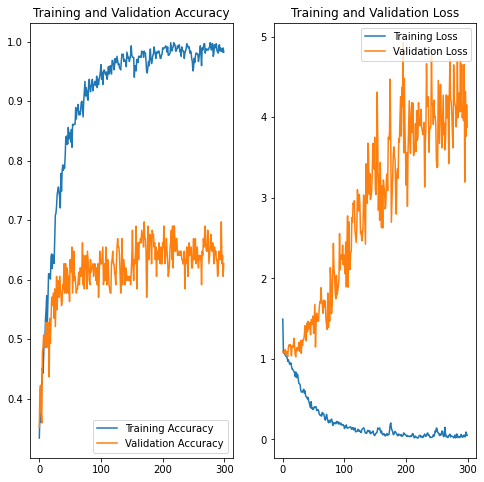

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
## Predict on new data

In [30]:
import numpy as np
path='image.jpg'
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 60ms/step
This image most likely belongs to converse with a 100.00 percent confidence.


In [29]:
#save our model
model.save('saved_model/my_model')


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets
